In [1]:
# Importacoes das Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
#import kaggle

# id e senha kaggle pelo os
# os.environ['KAGGLE_USERNAME'] = 'kaggle username'
# os.environ['KAGGLE_KEY'] = 'kaggle key'

In [ ]:
# Importar database netflix-shows do Kaggle
!kaggle datasets download -d shivamb/netflix-shows

In [ ]:
# Extrair o arquivo do .zip baixado
zipfile_name = 'netflix-shows.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [3]:
# Ler o csv para um DataFrame do Pandas
raw_data = pd.read_csv('netflix_titles.csv')

In [494]:
# Explorar o arquivo
raw_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [495]:
# Linhas e colunas: 8807, 12
raw_data.shape

(8807, 12)

In [496]:
# Objetivo inicial:
## Qual tipo de conteúdo o Brasil mais produziu, ou participou na produçao, para a Netflix?

## Qual a progressão da produção de conteúdo brasileiro ao longo do tempo?

## Que tipo de filmes o Brasil mais produziu?

## Qual a progressão da produção de filmes brasileiros ao longo do tempo?

## Que tipo de séries o Brasil mais produziu?

## Qual tipo de público (classificacao indicativa) o Brasil mais tem focado? Em séries e filmes

## O Brasil tem produzido mais conteudo para qual público ao longo do tempo?

## Existe uma relacao entre ano de lancamento e classificacao indicativa? 

## Existe uma relacao entre ano de lancamento e duracao de um filme?

## As series brasileiras costumam ser renovadas?

# ----------------------------------------------------------------------------------------------------------------------------

# Que tipo de informação precisamos?
## Shows que possuam 'Brazil' listado ('country')
## Tipos de cada conteúdo ('type')
## Categorias de cada conteúdo ('listed_in')
## Classificacao indicativa ('rating')
## Duracao de cada filme e série ('duration')

# ----------------------------------------------------------------------------------------------------------------------------

# Colunas necessárias:
## country, listed_in, type, release_year, rating, duration

In [497]:
# Alguns valores possuem uma lista de países.
raw_data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [498]:
# Mostra inicialmente 77 linhas, mas é possivel que esteja ignorando as listas
raw_data.query('country == "Brazil"').shape

(77, 12)

In [499]:
# Copiar raw_data   
data_split = raw_data.copy()

In [500]:
# Dividir os valores da coluna 'country' em uma lista de países
data_split['country'] = data_split['country'].str.split(', ')

# Cria uma nova linha para cada país
data_split = data_split.explode('country')

In [501]:
# Value counts de cada país
data_split['country'].value_counts()

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

In [502]:
# 97 produçoes com participação do Brasil
data_split.query('country == "Brazil"').shape

(97, 12)

In [503]:
# Criacao da tabela data_brazil
data_brazil = data_split.query('country == "Brazil"')
data_brazil = data_brazil.reset_index(drop=True)

In [504]:
# Verificando a tabela
data_brazil.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
3,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
4,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...",Brazil,"May 12, 2021",2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...


In [505]:
# Contagem de valores pra cada type
data_brazil['type'].value_counts()

Movie      66
TV Show    31
Name: type, dtype: int64

In [506]:
# Há muitas categorias agrupadas, vai ser necessário quebrar essas listas.
data_brazil['listed_in'].value_counts()

Stand-Up Comedy                                                      9
Dramas, Independent Movies, International Movies                     8
Documentaries, International Movies                                  6
Crime TV Shows, International TV Shows, TV Dramas                    5
Dramas, International Movies                                         4
Comedies, International Movies                                       4
Comedies, Dramas, International Movies                               3
Dramas, Faith & Spirituality, International Movies                   3
Children & Family Movies, Comedies, Music & Musicals                 3
International TV Shows, TV Comedies                                  3
Docuseries, International TV Shows                                   2
International TV Shows, TV Dramas, TV Mysteries                      2
Comedies, Dramas, Independent Movies                                 2
Children & Family Movies                                             2
Comedi

In [507]:
# Criando cópia
brazil_split = data_brazil.copy()

In [508]:
# Quebrando as listas em listed_in e criando uma linha nova pra cada valor
brazil_split['listed_in'] = brazil_split['listed_in'].str.split(', ')

brazil_split = brazil_split.explode('listed_in')


In [509]:
brazil_split.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,Documentaries,"A decade after the seminal Brazilian film ""Cit..."
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,International Movies,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,Dramas,A disillusioned psychologist tries to commit s...
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,International Movies,A disillusioned psychologist tries to commit s...


In [510]:
## Tratamento dos valores de release_year
brazil_split['release_year'] = pd.to_numeric(brazil_split['release_year'], errors='coerce')


In [511]:
# Checagem dos valores pra cada Categoria
brazil_split['listed_in'].value_counts()

International Movies            43
International TV Shows          26
Dramas                          26
Comedies                        20
Documentaries                   12
Independent Movies              12
TV Dramas                       11
Stand-Up Comedy                  9
Children & Family Movies         7
TV Comedies                      6
Docuseries                       6
Crime TV Shows                   6
TV Mysteries                     5
Action & Adventure               5
Reality TV                       5
Music & Musicals                 5
Faith & Spirituality             4
Thrillers                        3
Kids' TV                         3
LGBTQ Movies                     3
TV Horror                        2
Romantic Movies                  2
Romantic TV Shows                2
Science & Nature TV              2
TV Sci-Fi & Fantasy              2
Sports Movies                    2
Stand-Up Comedy & Talk Shows     1
Name: listed_in, dtype: int64

In [512]:
# Dropando International Movies e International TV Shows, pois são redundantes
values_to_drop = ['International Movies','International TV Shows']

brazil_split = brazil_split.loc[~brazil_split['listed_in'].isin(values_to_drop)]

In [513]:
# Após o drop, tabela brazil_split com 161 linhas
brazil_split.shape

(161, 12)

In [514]:
# Traduzindo pro portugues

## Classificacao indicativa:
rating_br = {
   'TV-MA': '18 anos',
    'TV-14': '16 anos',
    'TV-PG': '12 anos',
    'TV-G': 'Livre',
    'R': 'Restrito (menores de 17 anos)',
    'TV-Y': 'Livre ou 10 anos',
    'PG': '10 anos ou 12 anos',
    'NR': 'Não Classificado',
    'PG-13': '14 anos',
    'TV-Y7': '10 anos ou 12 anos'
}

brazil_split['rating'] = brazil_split['rating'].replace(rating_br)

## Tipo:
type_br = {
    'Movie':'Filmes',
    'TV Show':'Series'
}

brazil_split['type'] = brazil_split['type'].replace(type_br)


## Categorias
listed_in_br = {
    'Dramas': 'Dramas',
    'Comedies': 'Comédias',
    'Documentaries': 'Documentários',
    'Independent Movies': 'Filmes Independentes',
    'TV Dramas': 'Séries de Drama',
    'Stand-Up Comedy': 'Stand-Up Comedy',
    'Children & Family Movies': 'Filmes para Crianças e Família',
    'TV Comedies': 'Séries de Comédia',
    'Docuseries': 'Docusséries',
    'Crime TV Shows': 'Séries de Crime',
    'TV Mysteries': 'Séries de Mistério',
    'Action & Adventure': 'Ação e Aventura',
    'Reality TV': 'Reality Show',
    'Music & Musicals': 'Música e Musicais',
    'Faith & Spirituality': 'Fé e Espiritualidade',
    'Thrillers': 'Suspense',
    "Kids' TV": 'Programas Infantis',
    'LGBTQ Movies': 'Filmes LGBTQ+',
    'TV Horror': 'Séries de Terror',
    'Romantic Movies': 'Filmes Românticos',
    'Romantic TV Shows': 'Séries Românticas',
    'Science & Nature TV': 'Séries de Ciência e Natureza',
    'TV Sci-Fi & Fantasy': 'Séries de Ficção Científica e Fantasia',
    'Sports Movies': 'Filmes de Esporte',
    'Stand-Up Comedy & Talk Shows': 'Stand-Up Comedy e Talk Shows'
}

brazil_split['listed_in'] = brazil_split['listed_in'].replace(listed_in_br)

## Temporadas
duration_br = {
    '1 Season':'1 Temporada',
    '2 Seasons':'2 Temporadas',
    '3 Seasons':'3 Temporadas',
    '4 Seasons':'4 Temporadas',
    '5 Seasons':'5 Temporadas'
}

brazil_split['duration'] = brazil_split['duration'].replace(duration_br)

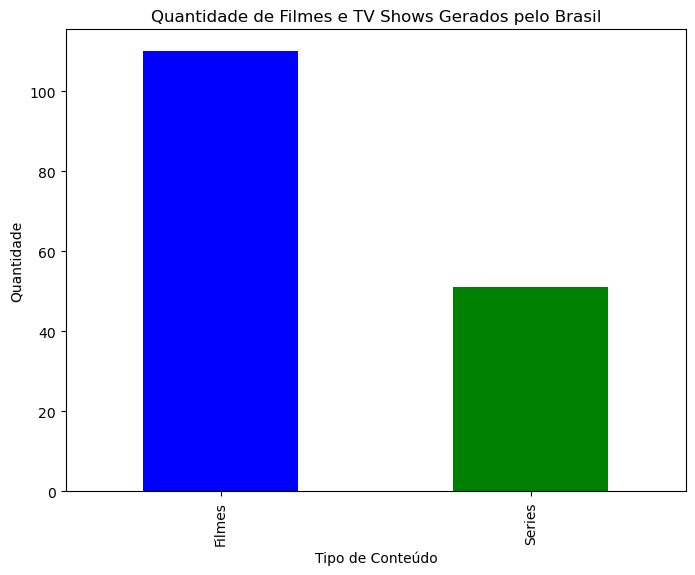

<Figure size 640x480 with 0 Axes>

In [515]:
## Qual tipo de conteúdo o Brasil mais produziu, ou participou na produçao, para a Netflix?
# ----------------------------------------------------------------------------------------------------------------------------

type_count = brazil_split['type'].value_counts()

# Criando  gráfico de barras
plt.figure(figsize=(8, 6))
type_count.plot(kind='bar', color=['blue', 'green'])
plt.title('Quantidade de Filmes e TV Shows Gerados pelo Brasil')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()
plt.clf()


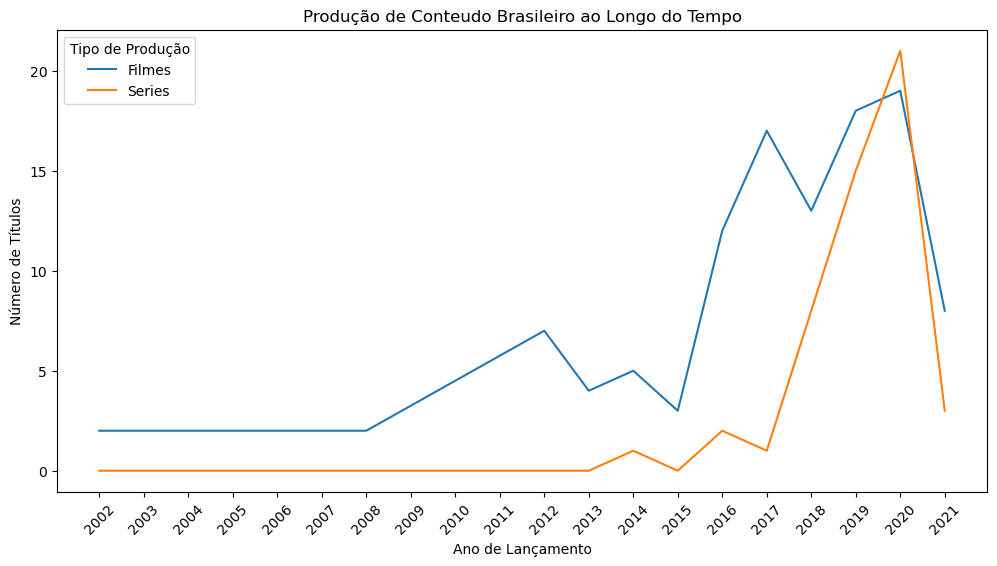

<Figure size 640x480 with 0 Axes>

In [516]:
## Qual a progressão da produção de conteúdo brasileiro ao longo do tempo?
# ----------------------------------------------------------------------------------------------------------------------------

brazil_type = brazil_split.groupby(['release_year','type']).size().unstack(fill_value=0)

# Criando  gráfico de linhas
brazil_type.plot(kind='line', figsize=(12,6))
plt.title('Produção de Conteudo Brasileiro ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Produção')
plt.xticks(range(2002,2022), rotation=45)


# Exibir o gráfico
plt.show()
plt.clf()

In [517]:
# Criacao de 2 novas tabelas, separadas pelo tipo principal
brazil_movies = brazil_split.query('type == "Filmes"')
brazil_tv_show = brazil_split.query('type == "Series"')

In [518]:
# Conferindo a tabela brazil_movies com 110 linhas
brazil_movies.shape

(110, 12)

In [519]:
# Conferindo a tabela brazil_tv_show com 51 linhas
brazil_tv_show.shape

(51, 12)

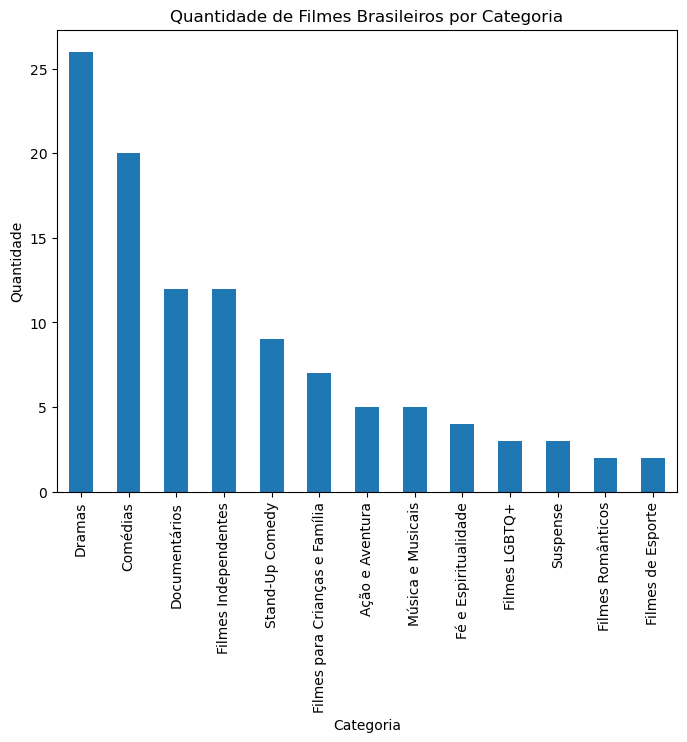

<Figure size 640x480 with 0 Axes>

In [520]:
## Que tipo de filmes o Brasil mais produziu?
# ----------------------------------------------------------------------------------------------------------------------------

movies_count = brazil_movies['listed_in'].value_counts()

# Criando  gráfico de barras
plt.figure(figsize=(8, 6))
movies_count.plot(kind='bar')
plt.title('Quantidade de Filmes Brasileiros por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()
plt.clf()

In [521]:
# Ainda há muitas categorias, o gráfico ficaria um caos. É necessário fazer um filtro das principais categorias
brazil_movies['listed_in'].value_counts()

Dramas                            26
Comédias                          20
Documentários                     12
Filmes Independentes              12
Stand-Up Comedy                    9
Filmes para Crianças e Família     7
Ação e Aventura                    5
Música e Musicais                  5
Fé e Espiritualidade               4
Filmes LGBTQ+                      3
Suspense                           3
Filmes Românticos                  2
Filmes de Esporte                  2
Name: listed_in, dtype: int64

In [522]:
# Criando os top movies para facilitar a visualizacao
top_categories_movies = ['Dramas','Comédias','Documentários','Filmes Independentes','Stand-up Comedy','Filmes para Crianças e Família']

top_movies =  brazil_movies[brazil_movies['listed_in'].isin(top_categories_movies)]

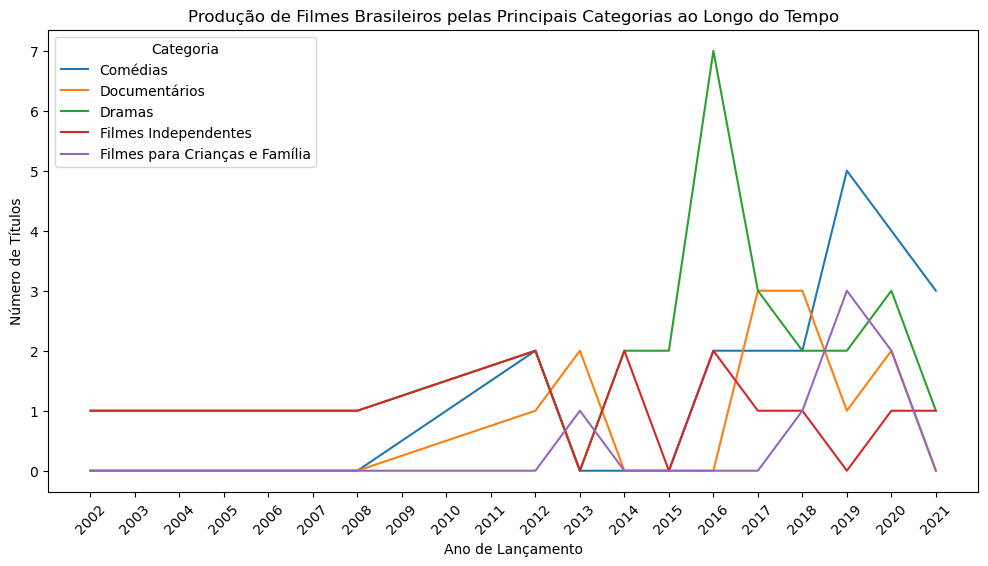

<Figure size 640x480 with 0 Axes>

In [523]:
## Qual a progressão da produção de filmes brasileiros ao longo do tempo?
# ----------------------------------------------------------------------------------------------------------------------------

movies_grouped = top_movies.groupby(['release_year','listed_in']).size().unstack(fill_value=0)

# Criando o gráfico de linhas
movies_grouped.plot(kind='line', figsize=(12,6))
plt.title('Produção de Filmes Brasileiros pelas Principais Categorias ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(title='Categoria')
plt.xticks(range(2002,2022), rotation=45)

# Exibir o gráfico
plt.show()
plt.clf()

In [524]:
# Contagem das séries 
brazil_tv_show['listed_in'].value_counts()

Séries de Drama                           11
Docusséries                                6
Séries de Crime                            6
Séries de Comédia                          6
Reality Show                               5
Séries de Mistério                         5
Programas Infantis                         3
Séries de Ficção Científica e Fantasia     2
Séries de Ciência e Natureza               2
Séries Românticas                          2
Séries de Terror                           2
Stand-Up Comedy e Talk Shows               1
Name: listed_in, dtype: int64

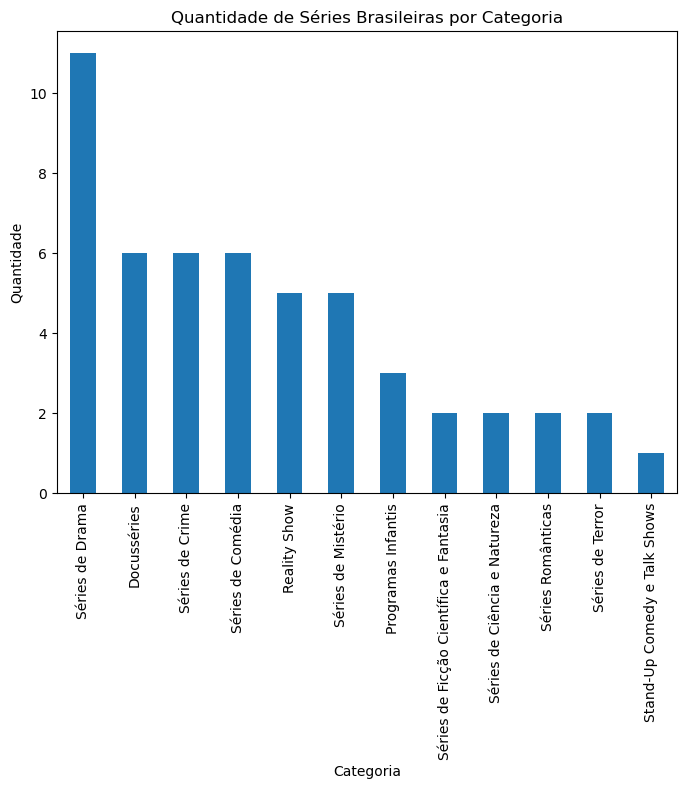

<Figure size 640x480 with 0 Axes>

In [525]:
## Que tipo de series o Brasil mais produziu?
# ----------------------------------------------------------------------------------------------------------------------------

shows_count = brazil_tv_show['listed_in'].value_counts()

# Criando  gráfico de barras
plt.figure(figsize=(8, 6))
shows_count.plot(kind='bar')
plt.title('Quantidade de Séries Brasileiras por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()
plt.clf()

In [526]:
# Criando top shows para facilitar a visualizacao
top_categories_shows = ['Séries de Drama', 'Séries de Crime', 'Séries de Comédia','Reality Show','Séries de Mistério']

top_shows = brazil_tv_show[brazil_tv_show['listed_in'].isin(top_categories_shows)]

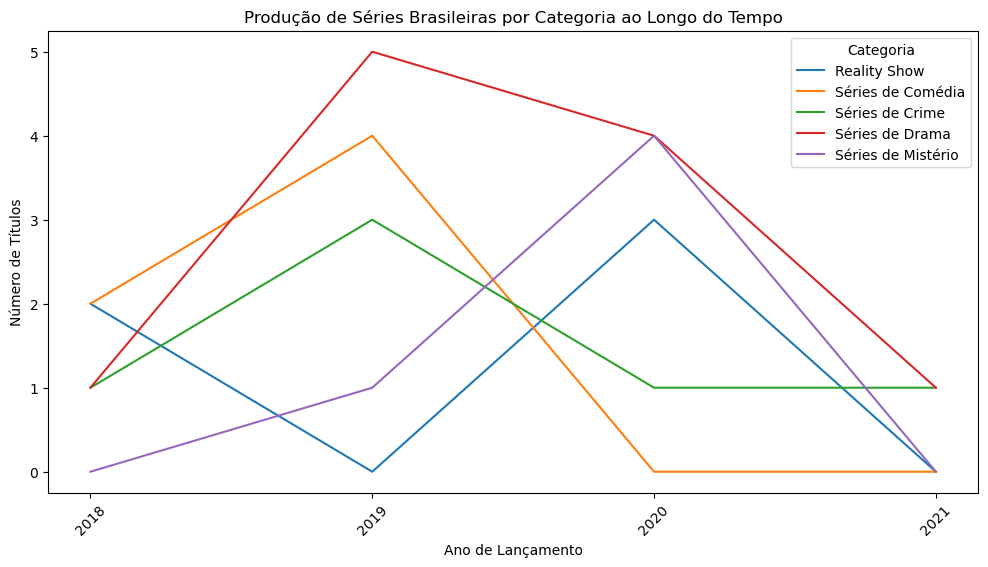

<Figure size 640x480 with 0 Axes>

In [527]:
## Qual a progressão da produção de series brasileiras ao longo do tempo?
# ----------------------------------------------------------------------------------------------------------------------------

shows_grouped = top_shows.groupby(['release_year','listed_in']).size().unstack(fill_value=0)

# Criando o gráfico de linhas
shows_grouped.plot(kind='line', figsize=(12,6))
plt.title('Produção de Séries Brasileiras por Categoria ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(title='Categoria')
plt.xticks(range(2018,2022), rotation=45)

# Exibir o gráfico
plt.show()
plt.clf()

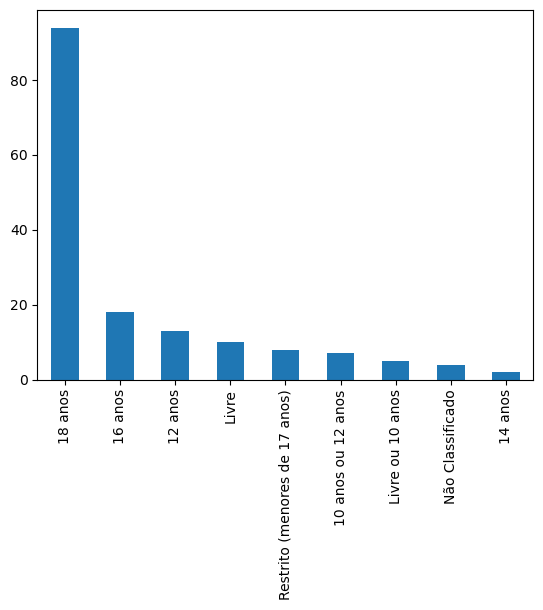

In [528]:
## Qual tipo de público (classificacao indicativa) o Brasil mais tem focado? 
# ----------------------------------------------------------------------------------------------------------------------------

rating_counts = brazil_split['rating'].value_counts()

# Criando gráfico de barras
rating_counts.plot(kind='bar')


# Exibir o gráfico
plt.show()


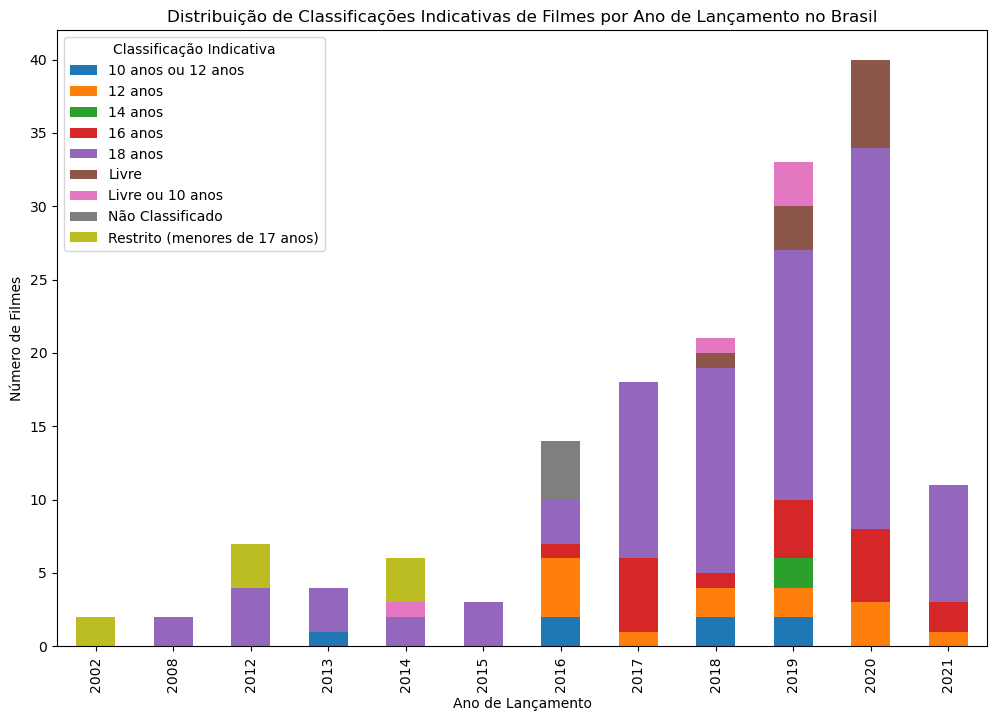

In [529]:
## Existe uma relacao entre ano de lancamento e classificacao indicativa? 
### O Brasil tem produzido mais conteudo para qual público ao longo do tempo?
# ----------------------------------------------------------------------------------------------------------------------------

# Tabela de contagem cruzada entre o ano de lançamento e a classificação indicativa
movies_rating = pd.crosstab(brazil_split['release_year'], brazil_split['rating'])

# Criando Gráfico de barras empilhadas
movies_rating.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')
plt.title('Distribuição de Classificações Indicativas de Filmes por Ano de Lançamento no Brasil')

# Exibir o gráfico
plt.legend(title='Classificação Indicativa')
plt.show()

/var/folders/l0/grx7fmx51kx9h6jq07pccfrw0000gn/T/ipykernel_1346/1656281035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_duration['duration'] = pd.to_numeric(movies_duration['duration'].str.replace(' min', ''), errors='coerce')


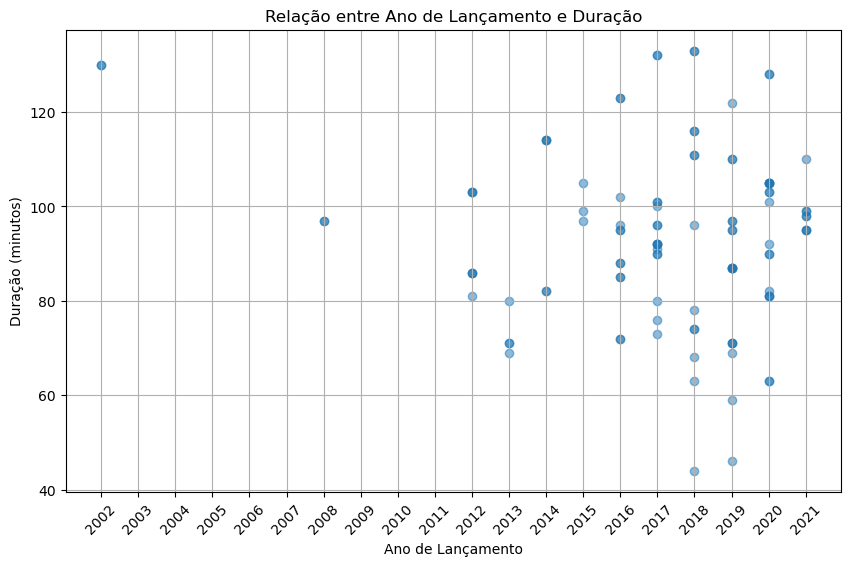

In [530]:
## Existe uma relacao entre ano de lancamento e duracao de um filme? 
### Durante os anos os filmes ganharam mais minutagem? Menos? Permanecerem os mesmos?
# ----------------------------------------------------------------------------------------------------------------------------

movies_duration = brazil_movies[['release_year','duration']]

# Certificando o formato numérico em duration
movies_duration['duration'] = pd.to_numeric(movies_duration['duration'].str.replace(' min', ''), errors='coerce')

# Sort values
movies_duration = movies_duration.sort_values(by='duration', ascending=False)

# Criando o Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_duration['release_year'], movies_duration['duration'], alpha=0.5)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.title('Relação entre Ano de Lançamento e Duração')
plt.xticks(range(2002,2022), rotation=45)
plt.grid(True)

# Exibir o gráfico
plt.show()

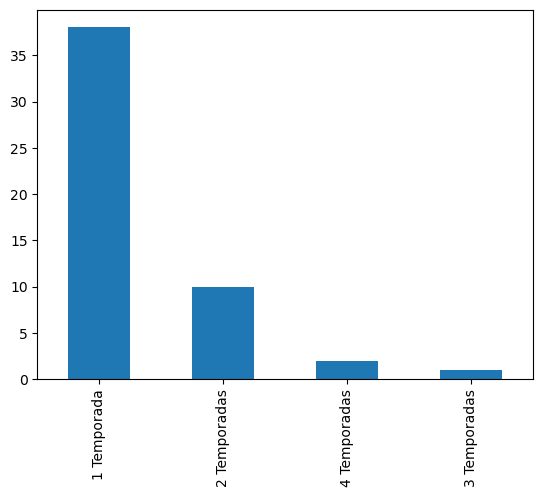

<Figure size 640x480 with 0 Axes>

In [531]:
## Existe uma relacao entre ano de lancamento e duracao de uma série?
# ----------------------------------------------------------------------------------------------------------------------------

series_duration = brazil_tv_show['duration'].value_counts()

# Criando o gráfico de barras
series_duration.plot(kind='bar')

# Exibir o gráfico
plt.show()
plt.clf()
